In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Attribute Information: (classes: edible=e, poisonous=p)


cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Create Data Frame and perform EDA

In [205]:
# data retrieved from: https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download&select=mushrooms.csv
df = pd.read_csv('mushrooms.csv')


In [206]:
df = df.rename(columns={'class':'edible'})
df.columns = df.columns.str.replace('-', '_')
# renamed 'class' to 'edible' and changed 'e' to 1 for TRUE and 'p' to 0 for FALSE
df['edible'] = df.edible.replace({'e':1, 'p':0})
df.head(10)

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,1,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,1,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,0,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,1,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [189]:
print(df.dtypes)

edible                       int64
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object


In [190]:
print(df['veil_type'].value_counts())

p    8124
Name: veil_type, dtype: int64


### The feature 'veil_type' only contains 1 value so I will drop that one

In [207]:
# the feature 'veil_type' only contains 1 value so I will drop that one

df = df.drop('veil_type', axis=1)

In [192]:
df.apply(pd.value_counts)

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,3916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN,NaN,400.0,210.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.0,NaN
b,NaN,452.0,NaN,168.0,NaN,NaN,NaN,NaN,5612.0,1728.0,...,NaN,NaN,432.0,432.0,NaN,NaN,NaN,48.0,NaN,NaN
c,NaN,4.0,NaN,44.0,NaN,192.0,NaN,6812.0,NaN,NaN,...,NaN,NaN,36.0,36.0,NaN,NaN,NaN,NaN,340.0,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3148.0
e,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,96.0,...,NaN,NaN,96.0,96.0,NaN,NaN,2776.0,NaN,NaN,NaN
f,NaN,3152.0,2320.0,NaN,4748.0,2160.0,7914.0,NaN,NaN,NaN,...,552.0,600.0,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN
g,NaN,NaN,4.0,1840.0,NaN,NaN,NaN,NaN,NaN,752.0,...,NaN,NaN,576.0,576.0,NaN,NaN,NaN,NaN,NaN,2148.0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   int64 
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [194]:
df.describe(include='all')

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124.000000,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,NaN,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,NaN,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,NaN,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148
mean,0.517971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.499708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transform Categorical Variables

In [139]:
from sklearn import preprocessing

In [208]:
encoded_dict = {}
df_transformed = df.copy()

for c in df.columns[1:]:
    le = preprocessing.LabelEncoder()
    le.fit(df[c])
    encoded_dict[df[c].name] = dict(zip(le.classes_, le.transform(le.classes_)))
    df_transformed[c] = le.transform(df[c])
       
df_transformed.head(10)


,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
5,1,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
6,1,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
7,1,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
8,0,5,3,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,2,4,1
9,1,0,2,9,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,3,3


In [209]:
for col, mapping in encoded_dict.items():
    print("\nColumn:", col)
    
    for key in mapping:
        print(f'{key}: {mapping[key]}', end=', ')


Column: cap_shape
b: 0, c: 1, f: 2, k: 3, s: 4, x: 5, 
Column: cap_surface
f: 0, g: 1, s: 2, y: 3, 
Column: cap_color
b: 0, c: 1, e: 2, g: 3, n: 4, p: 5, r: 6, u: 7, w: 8, y: 9, 
Column: bruises
f: 0, t: 1, 
Column: odor
a: 0, c: 1, f: 2, l: 3, m: 4, n: 5, p: 6, s: 7, y: 8, 
Column: gill_attachment
a: 0, f: 1, 
Column: gill_spacing
c: 0, w: 1, 
Column: gill_size
b: 0, n: 1, 
Column: gill_color
b: 0, e: 1, g: 2, h: 3, k: 4, n: 5, o: 6, p: 7, r: 8, u: 9, w: 10, y: 11, 
Column: stalk_shape
e: 0, t: 1, 
Column: stalk_root
?: 0, b: 1, c: 2, e: 3, r: 4, 
Column: stalk_surface_above_ring
f: 0, k: 1, s: 2, y: 3, 
Column: stalk_surface_below_ring
f: 0, k: 1, s: 2, y: 3, 
Column: stalk_color_above_ring
b: 0, c: 1, e: 2, g: 3, n: 4, o: 5, p: 6, w: 7, y: 8, 
Column: stalk_color_below_ring
b: 0, c: 1, e: 2, g: 3, n: 4, o: 5, p: 6, w: 7, y: 8, 
Column: veil_color
n: 0, o: 1, w: 2, y: 3, 
Column: ring_number
n: 0, o: 1, t: 2, 
Column: ring_type
e: 0, f: 1, l: 2, n: 3, p: 4, 
Column: spore_print_colo

### Check correlation with heatmap

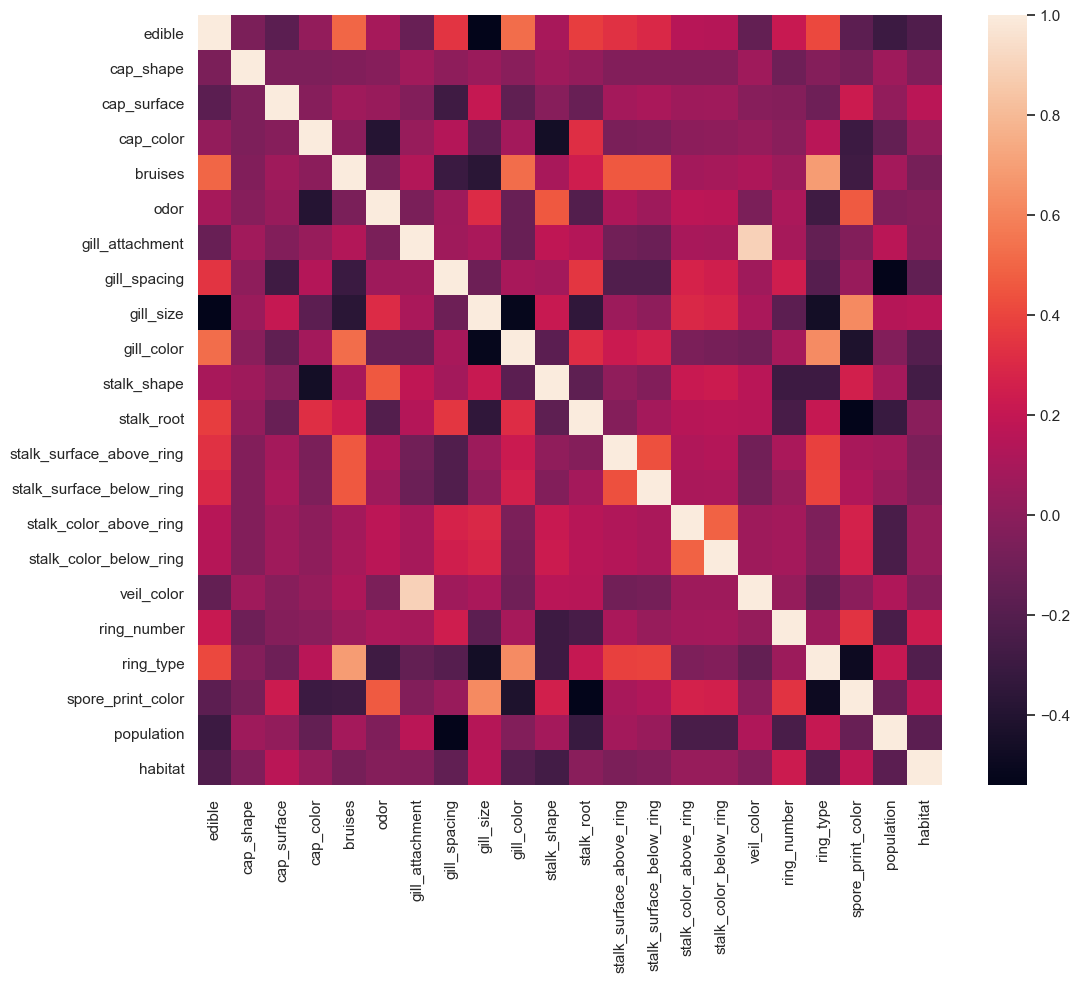

In [232]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df_transformed.corr())

## Stats Models Generalized Linear Model for Logistic Regression

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [212]:
def get_formula(df):
   column_list = list(df.columns)
   #remove first response column
   del column_list[0]
   formula = f'edible ~ {column_list[0]}'
   del column_list[0]
   for f in column_list:
      formula = formula + ' + ' + f
   return formula

In [247]:
glm_model = smf.glm(formula = get_formula(df_transformed), data = df_transformed, family=sm.families.Binomial())
glm_result = glm_model.fit()
print(glm_result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 edible   No. Observations:                 8124
Model:                            GLM   Df Residuals:                     8102
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1071.0
Date:                Wed, 21 Jun 2023   Deviance:                       2142.1
Time:                        14:51:44   Pearson chi2:                 1.64e+06
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### According to the results summary above, it seems as though the variables cap_shape, gill_attachment, and veil_color with higher p-values above 0.05 are not significant predictors for the 'edible' response. I will try removing those and running again.

In [214]:
reduced_df = df_transformed.drop(['cap_shape', 'gill_attachment', 'veil_color'], axis=1)
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edible                    8124 non-null   int64
 1   cap_surface               8124 non-null   int64
 2   cap_color                 8124 non-null   int64
 3   bruises                   8124 non-null   int64
 4   odor                      8124 non-null   int64
 5   gill_spacing              8124 non-null   int64
 6   gill_size                 8124 non-null   int64
 7   gill_color                8124 non-null   int64
 8   stalk_shape               8124 non-null   int64
 9   stalk_root                8124 non-null   int64
 10  stalk_surface_above_ring  8124 non-null   int64
 11  stalk_surface_below_ring  8124 non-null   int64
 12  stalk_color_above_ring    8124 non-null   int64
 13  stalk_color_below_ring    8124 non-null   int64
 14  ring_number               8124 non-null 

In [215]:
glm_model2 = smf.glm(formula = get_formula(reduced_df), data = reduced_df, family=sm.families.Binomial()).fit()
print(glm_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 edible   No. Observations:                 8124
Model:                            GLM   Df Residuals:                     8105
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.1
Date:                Wed, 21 Jun 2023   Deviance:                       2882.1
Time:                        11:19:52   Pearson chi2:                 2.74e+08
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### After running a new glm model with the reduced_df, it now appears that 'bruises', 'stalk_surface_below_ring', 'stalk_color_below_ring', and 'habitat' are also not significant

In [246]:
reduced_df = reduced_df.drop(['bruises', 'stalk_surface_below_ring', 'stalk_color_below_ring', 'habitat'], axis=1)
glm_model3 = smf.glm(formula = get_formula(reduced_df), data = reduced_df, family=sm.families.Binomial()).fit()
print(glm_model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 edible   No. Observations:                 8124
Model:                            GLM   Df Residuals:                     8109
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.9
Date:                Wed, 21 Jun 2023   Deviance:                       2885.8
Time:                        14:35:13   Pearson chi2:                 3.10e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Stats Models Logit Regression Model

In [251]:
x = df_transformed[[x for x in df_transformed.columns[1:]]]
y = df_transformed[['edible']]

In [252]:
log_reg = sm.Logit(y, x).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.155055
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 edible   No. Observations:                 8124
Model:                          Logit   Df Residuals:                     8103
Method:                           MLE   Df Model:                           20
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                  0.7761
Time:                        16:42:27   Log-Likelihood:                -1259.7
converged:                       True   LL-Null:                       -5625.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cap_shape                    0.0486      0.032      1.499      0.134      -0.01

In [254]:
x = x.drop(['cap_shape', 'stalk_shape', 'stalk_surface_below_ring', 'habitat'], axis=1)
log_reg = sm.Logit(y, x).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.155477
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 edible   No. Observations:                 8124
Model:                          Logit   Df Residuals:                     8107
Method:                           MLE   Df Model:                           16
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                  0.7755
Time:                        16:45:00   Log-Likelihood:                -1263.1
converged:                       True   LL-Null:                       -5625.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cap_surface                 -0.3799      0.057     -6.704      0.000      -0.49

In [248]:
x_train = reduced_df[[x for x in reduced_df.columns[1:]]]
y_train = reduced_df[['edible']]

In [249]:
log_reg2 = sm.Logit(y_train, x_train).fit()
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.219516
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 edible   No. Observations:                 8124
Model:                          Logit   Df Residuals:                     8110
Method:                           MLE   Df Model:                           13
Date:                Wed, 21 Jun 2023   Pseudo R-squ.:                  0.6830
Time:                        15:05:38   Log-Likelihood:                -1783.3
converged:                       True   LL-Null:                       -5625.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cap_surface                 -0.4755      0.044    -10.917      0.000      -0.56

## SKLEARN Models

### Establish predictor and response variables

In [219]:
y = df_transformed['edible'].values
X = df_transformed.drop('edible', axis=1).values

In [220]:
print(y.shape)
print(X.shape)

(8124,)
(8124, 21)


### Split data for training and testing

In [11]:
from sklearn.model_selection import train_test_split


In [221]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build Random Forest model

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [224]:
rf_model = RandomForestClassifier().fit(x_train, y_train)

### Predict first 10 of test data

In [257]:
for i in range(10):
   print(f'Predicted: {rf_model.predict([x_test[i]])}, Actual: {y_test[i]}')

Predicted: [1], Actual: 1
Predicted: [0], Actual: 0
Predicted: [0], Actual: 0
Predicted: [1], Actual: 1
Predicted: [0], Actual: 0
Predicted: [0], Actual: 0
Predicted: [0], Actual: 0
Predicted: [0], Actual: 0
Predicted: [1], Actual: 1
Predicted: [1], Actual: 1


In [225]:
y_pred = rf_model.predict(x_test)

In [235]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{cm}')

Test Accuracy: 1.0
Confusion Matrix: 
[[782   0]
 [  0 843]]


### Build Decision Tree model

In [236]:
tree = DecisionTreeClassifier().fit(x_train, y_train)

In [237]:
tree_pred = tree.predict(x_test)

In [238]:
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_cm = confusion_matrix(y_test, tree_pred)

print(f'Decision Tree Test Accuracy: {tree_accuracy}')
print(f'Decision Tree Confusion Matrix: \n{tree_cm}')

Decision Tree Test Accuracy: 1.0
Decision Tree Confusion Matrix: 
[[782   0]
 [  0 843]]


### Build Logistic Regression model

In [240]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [241]:
# Using pipelining to apply scaling to test data without leaking training data
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)
# lr = LogisticRegression().fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [258]:
for i in range(10):
   print(f'Predicted: {pipe.predict([x_test[i]])}, Actual: {y_test[i]}')

Predicted: [1], Actual: 1
Predicted: [0], Actual: 0
Predicted: [0], Actual: 0
Predicted: [1], Actual: 1
Predicted: [0], Actual: 0
Predicted: [0], Actual: 0
Predicted: [0], Actual: 0
Predicted: [0], Actual: 0
Predicted: [1], Actual: 1
Predicted: [1], Actual: 1


In [259]:
lr_preds = pipe.predict(x_test)

In [261]:
print(f'Logistic Regression Accuracy: {pipe.score(x_test, y_test)}')
print(f'Logistic Regression Confusion Matrix: \n{confusion_matrix(y_test, lr_preds)}')

Logistic Regression Accuracy: 0.952
Logistic Regression Confusion Matrix: 
[[748  34]
 [ 44 799]]
